In [1]:
#!pip install -U torch torchvision torchtext torchdata pytest torchsummary portalocker

### Import libraries

In [11]:
from data_chatbot import questions_answers, load_df, toTensor, show_lengths, tokenize_questions,tokenize_answers
from data_chatbot import pretrained_w2v # prepare_text
from models_chatbot import Seq2Seq
from vocab_chatbot import Vocab

### current ToDo: adjust train method in train_chatbot.py

from train_chatbot import pretrain, train



In [3]:
source_name = "poc"
#source_name = "squad1"

### Raw data

In [4]:
df_train, df_test = load_df(source_name=source_name)
df_train.head()

,Unnamed: 0,question,answer
0,0,What is your name?,['My name is Vanessa Elliott']
1,1,What is your name?,['My name is Ada Henderson']
2,2,What is your name?,['My name is Daniel Grant']
3,3,What is your name?,['My name is Lydia Carroll']
4,4,What is your name?,['My name is John Scott']


### Tokenized sentences

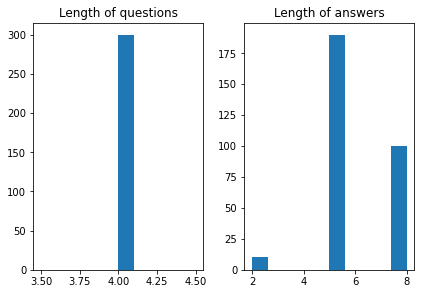

In [5]:
questions_train_raw, questions_valid_raw, answers_train_raw, answers_valid_raw = questions_answers(source_name=source_name)
show_lengths(questions_train_raw, questions_valid_raw, answers_train_raw, answers_valid_raw)

### Filter data

In [6]:
# if desired remove outliers

### Create vocabularies

In [7]:
vQ = Vocab("Questions")
for sequence in [["<SOS>", "<EOS>"]] + questions_train_raw + questions_valid_raw:
    for token in sequence:
        vQ.indexWord(token)
vA = Vocab("Answers")
for sequence in [["<SOS>", "<EOS>"]] + answers_train_raw + answers_valid_raw:
    for token in sequence:
        vA.indexWord(token)
print(f"The source vocabulary contains {len(vQ.words)} and the target vocabulary contains {len(vA.words)} words.")

The source vocabulary contains 7 and the target vocabulary contains 146 words.


### Create vectors

In [8]:
questions_train = tokenize_questions(questions_train_raw, vQ)
answers_train = tokenize_answers(answers_train_raw, vA)

### Create model

In [9]:
input_size = len(vQ.words)
hidden_size = 100
output_size = len(vA.words) 

dropout_E=0
dropout_D=0
teacher_forcing_ratio=1
certain=True

model = Seq2Seq(input_size, hidden_size, output_size, vQ, vA, dropout_E, dropout_D, teacher_forcing_ratio,certain)

### Utilize pretrained embeddings

In [12]:
w2v = pretrained_w2v(init=False)
model = pretrain(model, vQ, vA, w2v)

For 5 of 7 words an entry has been found in the brown corpus.
For 12 of 146 words an entry has been found in the brown corpus.


#### => most_similar is not working after adding vector in gensim

### Train model

In [13]:
train()

NameError: name 'src' is not defined